In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import jsonargparse
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# configure matplotlib
%matplotlib notebook
# %matplotlib inline

In [4]:
#mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('font',**{'family':'serif'})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [5]:
from cdi.util.analysis.show_frey_faces import show_examples
from cdi.data.frey_faces import FreyFacesDataset

## Analysis setup

### Global settings

In [6]:
data_name = 'fcvae_frey_processed'
exp_seed_keys = [
    'm20190508_d20200325_20200406_20200407',
#     'm2019050811_d2020032511_20200406_20200407',
#     'm2019050822_d2020032522_20200406_20200407',
#     'm2019050833_d2020032533_20200406_20200407',
#     'm2019050844_d2020032544_20200406_20200407',
#     'm2019050855_d2020032555_20200406_20200407',
#     'm2019050866_d2020032566_20200406_20200407',
#     'm2019050877_d2020032577_20200406_20200407',
#     'm2019050888_d2020032588_20200406_20200407',
#     'm2019050899_d2020032599_20200406_20200407',
]

### Templates

In [7]:
log_path_base = f'../../trained_models/{data_name}/learning_experiments'

## Helpers

## Imputations

In [8]:
original_dataset = FreyFacesDataset('../../data', preprocess=False, test=False, generated='FC-VAE')

In [9]:
gibbs_path = f'{log_path_base}/{{}}/{{}}/{{}}/logs/tensors/train_data_final.npz'
obs_mean_path = f'{log_path_base}/{{}}/{{}}/{{}}/logs/tensors/obs_mean_0.npz'

### 16%

In [10]:
model = 'mice_imputation'
exp_seed_key = exp_seed_keys[0]
group = 1

data = np.load(gibbs_path.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)
# X_postprocessed = data['X']

In [11]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[]
(0,)


<IPython.core.display.Javascript object>


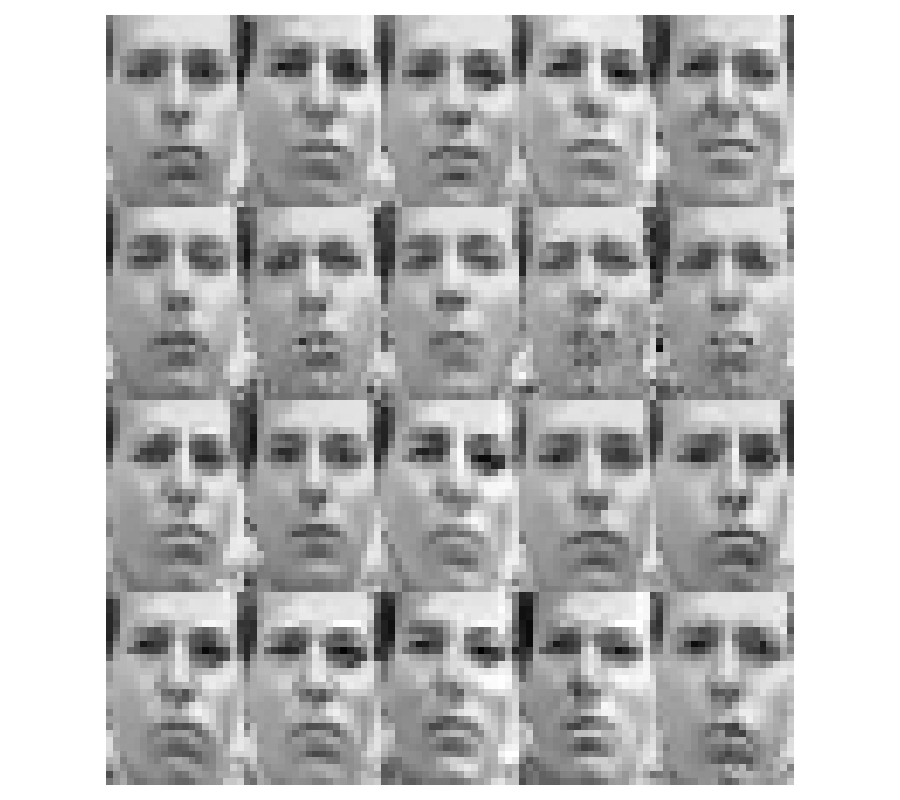

In [12]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


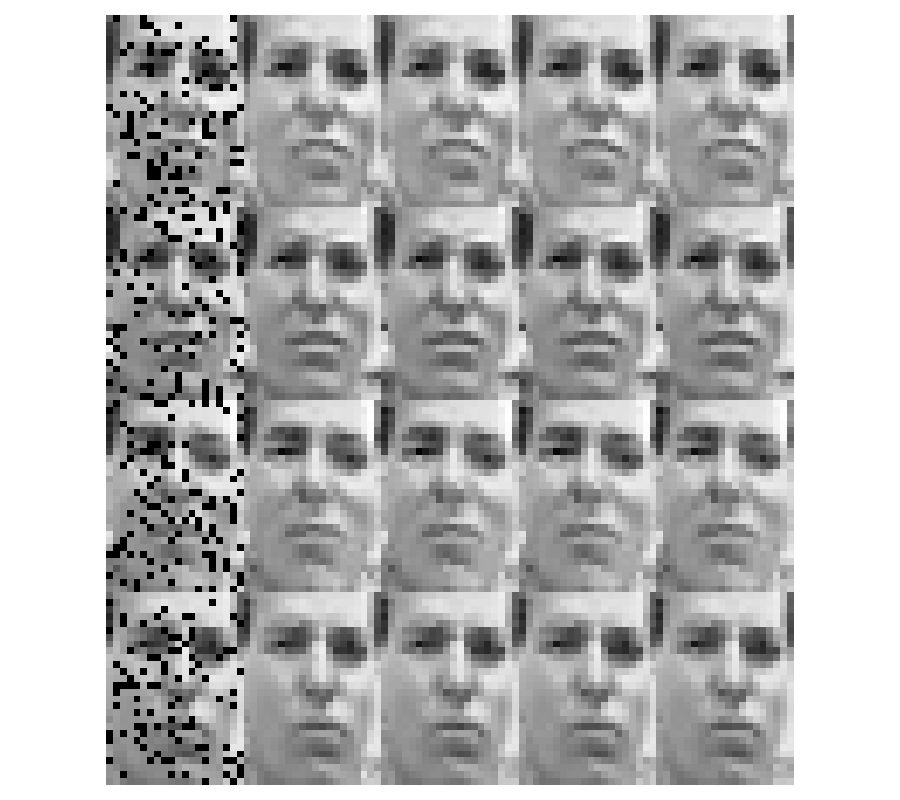

In [18]:
idx = np.sort(np.random.choice(np.unique(data['M'], axis=0, return_index=True)[1], 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(np.all(data['M'] == data['M'][i], axis=-1))[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

### 50%

In [20]:
model = 'mice_imputation'
exp_seed_key = exp_seed_keys[0]
group = 3

data = np.load(gibbs_path.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [21]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[]
(0,)


<IPython.core.display.Javascript object>


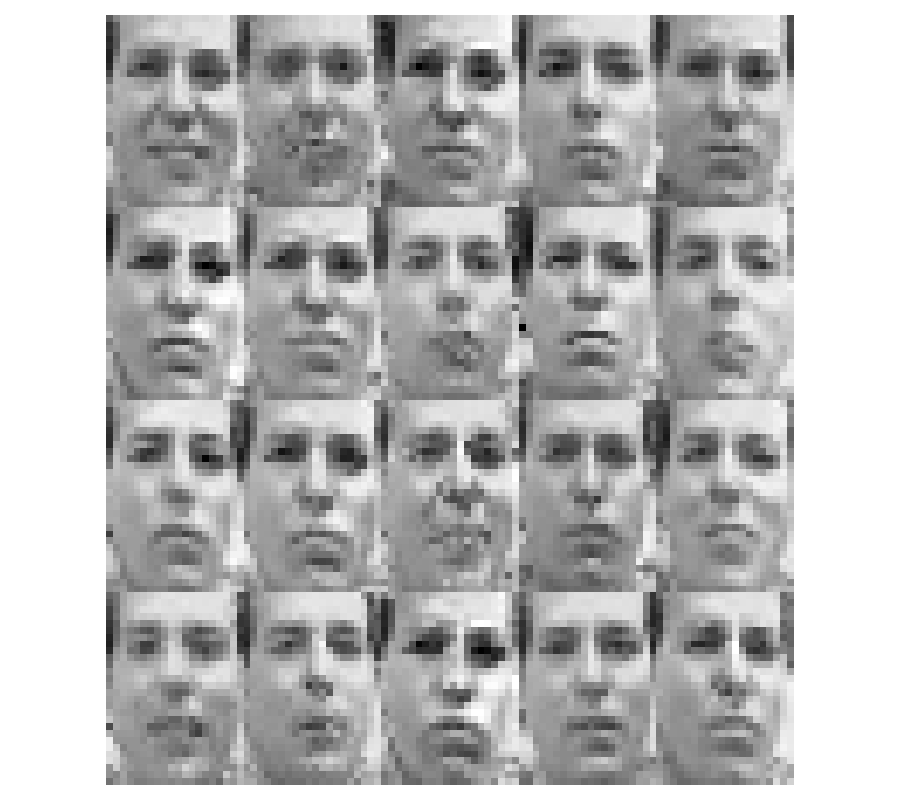

In [23]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


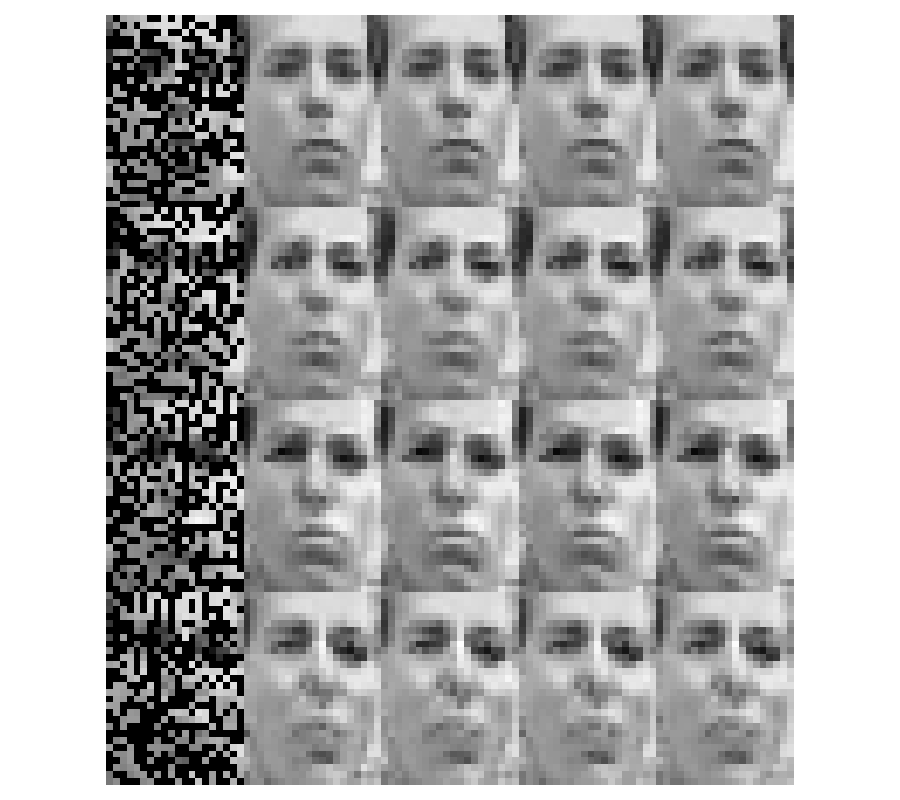

In [24]:
idx = np.sort(np.random.choice(np.unique(data['M'], axis=0, return_index=True)[1], 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(np.all(data['M'] == data['M'][i], axis=-1))[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

### 83%

In [25]:
model = 'mice_imputation'
exp_seed_key = exp_seed_keys[0]
group = 5

data = np.load(gibbs_path.format(group, model, exp_seed_key), allow_pickle=True)
obs_mean = np.load(obs_mean_path.format(group, model, exp_seed_key), allow_pickle=True)
X = data['X'] + obs_mean['obs_mean']
X_postprocessed = original_dataset.postprocess(X)

In [26]:
X_postprocessed.shape

(12000, 560)

In [27]:
diverged = np.where(np.isnan(np.min(data['X'], axis=-1)))[0]
print(diverged)
print(diverged.shape)

[]
(0,)


<IPython.core.display.Javascript object>


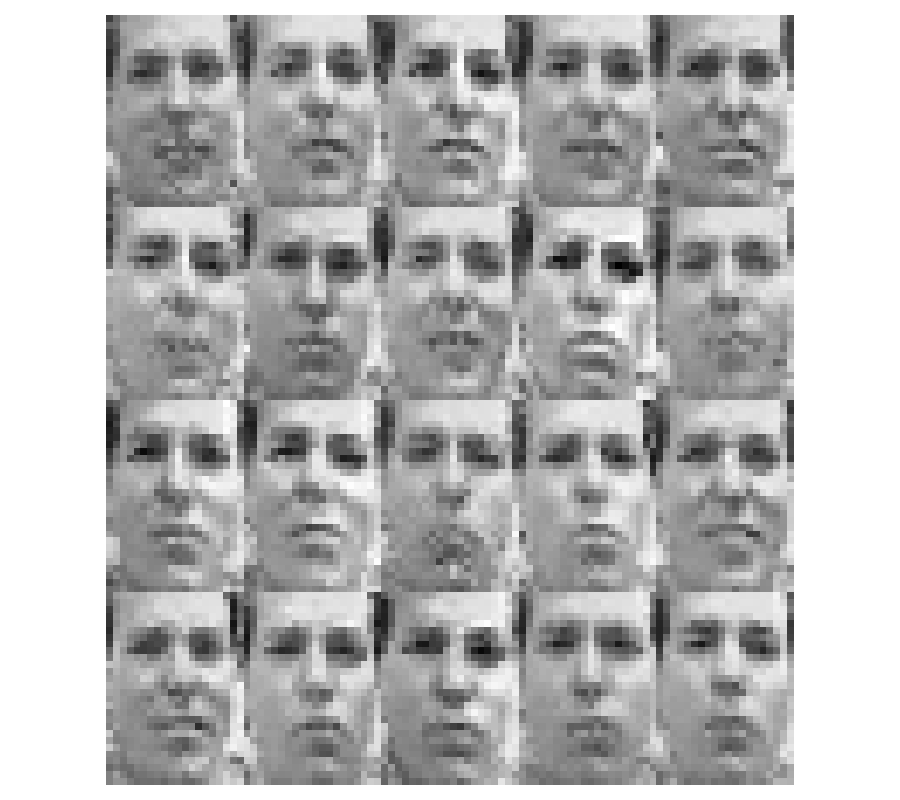

In [28]:
# Show examples
ids = np.random.choice(np.arange(len(X_postprocessed)), 20)
show_data = np.clip(X_postprocessed, 0, 1)[ids]
mask = data['M'][ids]
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))

<IPython.core.display.Javascript object>


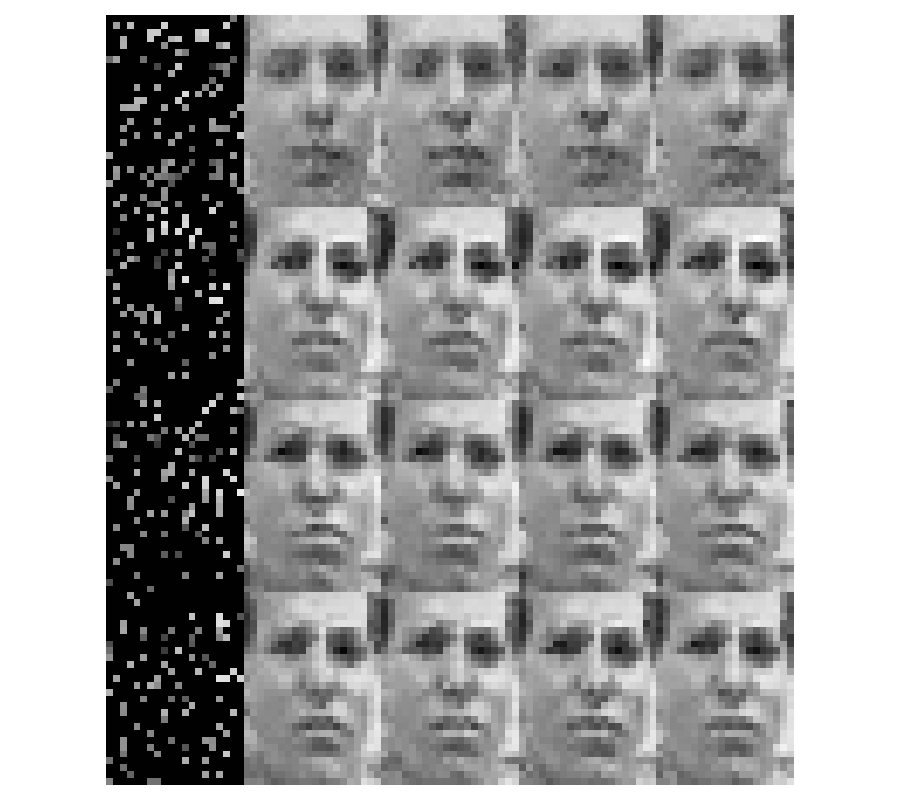

In [29]:
idx = np.sort(np.random.choice(np.unique(data['M'], axis=0, return_index=True)[1], 5, replace=False))
show_data = []
mask = []
for i in idx:
    # Select image indices for particular original image I
    idx_i = np.random.choice(np.where(np.all(data['M'] == data['M'][i], axis=-1))[0], 5, replace=False)
    show_data.append(X_postprocessed[idx_i])
    mask.append(data['M'][idx_i])
    
    # Mask first, to see where the data is missing
    show_data[-1][0] *= mask[-1][0]
show_data = np.concatenate(show_data)
mask = np.concatenate(mask)

show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False, figsize=(9, 8))